## Project 1: Money Ball!

### Due 10/2/25 at 11:55 pm (see Canvas Assignment)

****

## Collaboration policy

This is a group project, and the assignments are available on this Canvas assignment webpage. Please be welcoming and kind to the students in your group (i.e., be a good classmate).

**You may not change groups or work alone.** Any deviations will result in a zero grade. If you have questions about what is allowed or not, you must ask. Saying later that you didn't understand or were unsure is not an acceptable excuse.

In the markdown cell below, put the full name of each person in your group.


### Team members

1. Brian Pov
2. Yuyang Deng

****
## AI policy

AI may not be used to generate a coding solution. Your solution must be your own work. If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.




****
## Honor pledge

To acknowledge and understand the **Collaboration and AI policies** outlined above, each team member must enter their Onyen and PID in this markdown cell.

1. bppov | 730616775
2. dyy12 | 730660498

****

## Python modules

All the Python modules needed to complete this project are provided to you. 

<span style="background-color: #FFFF00">**No other modules are authorized** and **if other modules are added points will be deducted**.</span>

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from scipy.optimize import minimize
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')

****

### Baseball Data

<a href=https://www.kaggle.com/open-source-sports/baseball-databank>Baseball Databank</a> is a compilation of historical baseball data from 1871 to 2015. Here, we are using a subset of this databank. Specifically, from 1961 to 2015, which includes these statistics.
- year
- team name
- games played
- wins
- losses
- runs scored
- at bats
- hits
- doubles
- triples
- homeruns
- walks
- strikeouts
- stolen bases
- earned runs allowed
- complete games
- hits allowed
- homeruns allowed

Tips:
- This numpy <a href="https://numpy.org/doc/stable/user/absolute_beginners.html">tutorial</a> may be helpful.
- This dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">selecting, slicing, and extracting tutorial</a> may be helpful.
- This datafame <a href="https://www.geeksforgeeks.org/python/filter-pandas-dataframe-with-multiple-conditions/">conditional filtering tutorial</a> maybe be helpful.
- This Matplotlib <a href="https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html">3D scatter plot tutorial</a> may be helpful.
- The data visualization notebook (see Canvas schedule, 8/21) may be helpful.
- The data representation slides (see Canvas schedule) may be helpful.
- The performance evaluation slides (see Canvas schedule) may be helpful.
- The introduction to supervised learning slides (see Canvas schedule) may be helpful.
- The regression slides (see Canvas schedule) may be helpful.

****

In [76]:
teams_df = pd.read_csv("teams.csv")
teams_df

,year,team name,games played,wins,losses,runs scored,at bats,hits,doubles,triples,homeruns,walks,strikeouts,stolen bases,earned runs allowed,complete games,hits allowed,homeruns allowed
0,1961,Baltimore Orioles,163,95,67,691,5481,1393,227,36,149,581,902,39,526,54,1226,109
1,1961,Boston Red Sox,163,76,86,729,5508,1401,251,37,112,647,847,56,687,35,1472,167
2,1961,Chicago White Sox,163,86,76,765,5556,1475,216,46,138,550,612,100,653,39,1491,158
3,1961,Chicago Cubs,156,64,90,689,5344,1364,238,51,176,539,1027,35,689,34,1492,165
4,1961,Cincinnati Reds,154,93,61,710,5243,1414,247,35,158,423,761,70,575,46,1300,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,2015,Los Angeles Dodgers,162,92,70,667,5385,1346,263,26,187,563,1258,59,553,6,1317,145
1442,2015,San Francisco Giants,162,84,78,696,5565,1486,288,39,136,457,1159,93,597,7,1344,155
1443,2015,Arizona Diamondbacks,162,79,83,720,5649,1494,289,48,154,490,1312,132,659,1,1450,182
1444,2015,San Diego Padres,162,74,88,650,5457,1324,260,36,148,426,1327,82,655,1,1371,171


****

**P1** (10 Points): Data Visualization.

<img src="p1.png" width="600" style="float: right"/>

Using the **teams_df** dataframe, create a new dataframe to visualize ``Wins vs Homeruns``, ``Wins vs Runs Scored``, ``Wins vs Walks``, and ``Wins vs Doubles`` between 1980 and 2015 (inclusive) for the teams listed below.
- New York Yankees
- Boston Red Sox
- Chicago Cubs
- Baltimore Orioles

To receive full credit, your new dataframe must generate scatter plots identical to the ones provided.

You may assume:
- All the data (in your dataframe) is used to generate these scatter plots.
- The colors used to generate plots are blue and black.
- The plot figure size is 12 inches in width and 12 inches in height.
- The default x-axis, y-axis, and z-axis tick values are used.
- The scatter plot marker size is 30.
- The z_label is rotated 90 degrees, and the zaxis.labelpad is set to -0.7.

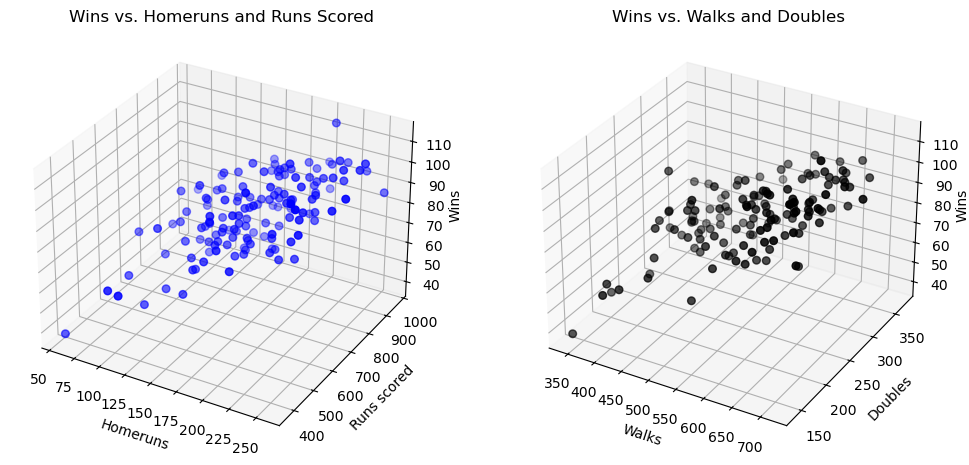

In [77]:
# --------------------------------------
# Add your P1 coding solution below.
# --------------------------------------

teams = ["New York Yankees", "Boston Red Sox", "Chicago Cubs", "Baltimore Orioles"]

mask_years = (teams_df["year"] >= 1980) & (teams_df["year"] <= 2015)
mask_teams = teams_df['team name'].isin(teams)
teams_df_new = teams_df[mask_years & mask_teams].copy()
P1 = teams_df_new[["year", "team name", "wins", "homeruns", "runs scored", "walks", "doubles"]].reset_index(drop=True)
P1 = P1.rename(columns={
    "wins": "Wins",
    "homeruns": "Homeruns",
    "runs scored": "Runs Scored",
    "walks": "Walks",
    "doubles": "Doubles",
})

fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.scatter(P1["Homeruns"], P1["Runs Scored"], P1["Wins"], c="blue", s=30)
ax1.set_xlabel("Homeruns")
ax1.set_ylabel("Runs scored")
ax1.set_zlabel("Wins", rotation=90, labelpad=-0.7)
ax1.set_title("Wins vs. Homeruns and Runs Scored")

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.scatter(P1["Walks"], P1["Doubles"], P1["Wins"], c="black", s=30)
ax2.set_xlabel("Walks")
ax2.set_ylabel("Doubles")
ax2.set_zlabel("Wins", rotation=90, labelpad=-0.7)
ax2.set_title("Wins vs. Walks and Doubles")

plt.show()

****

**P2** (10 Points): Closed-form OLSR prediction models.

<img src="p2.png" width="600" style="float: right"/>

Using the **P1** dataframe, this question will construct and evaluate two OLSR prediction models. Specifically:
- the first model will predict the number of ``wins`` when given  ``Homeruns`` and ``Runs Scored``,
- and the second model predict the number of ``wins`` when given ``Walks`` and ``Doubles``.

Before model construction and evaluation, **P1** will be randomly shuffled and then partitioned into two sets using an 80/20 split. Specifically, 80% of the data will be used to train, and 20% will be reserved for testing both models. 

For each prediction model, the correlation coefficient ($R^2$) and mean absolute error (MAE) measures for both the training and testing data sets are reported in the plot title. These may be calculated using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html">mean_absolute_error</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html">r2_score</a> sklearn functions that are provided in authorized Python modules above.

To receive full credit, your solution must generate a plot similar to the reference plots. <span style="background-color: #FFFF00">**Note**: because the data is randomly shuffled each time the cell is run, your plots and measures will be slightly different than those provided in the reference plots.</span>

You may assume:
- Only the training data is used to generate the scatter plots.
- The colors used to generate plots are blue, black, and red (fitted line).
- The plot figure size is 12 inches in width and 12 inches in height.
- The default x-axis, y-axis, and z-axis tick values are used.
- The scatter plot marker size is 30.
- The z_label is rotated 90 degrees, and the zaxis.labelpad is set to -0.7.


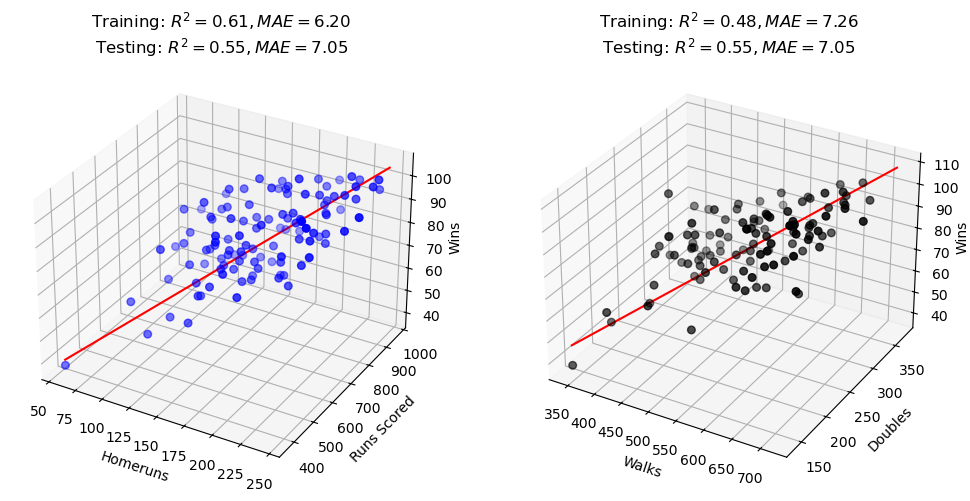

In [78]:
title_str = "Training: $R^2={0:.2f}, MAE={1:0.2f}$\nTesting: $R^2={2:.2f}, MAE={3:0.2f}$"

# --------------------------------------
# Add your P2 coding solution below.
# --------------------------------------

def f(params, x, y, z):
    m1, m2, b = params
    z_predicted = m1*x + m2*y + b
    error = z - z_predicted
    return np.sum(error**2)

train_size = int(np.round(len(P1) * 0.8))
shuffled_teams = P1.sample(frac=1)
training_set = shuffled_teams.iloc[:train_size]
test_set = shuffled_teams.iloc[train_size:]


# OLSR for both models
params = np.array([0.0, 0.0, 0.0])

result_hr_runs = minimize(f, params, args=(training_set['Homeruns'].values, training_set['Runs Scored'].values, training_set['Wins'].values), 
                                method="Nelder-Mead")
result_walk_db = minimize(f, params, args=(training_set['Walks'].values, training_set['Doubles'].values, training_set['Wins'].values), 
                                method="Nelder-Mead")

model1_m1, model1_m2, model1_int = result_hr_runs.x
model2_m1, model2_m2, model2_int = result_walk_db.x

# Evaluate against training set
z_pred_hr_runs = model1_m1*training_set['Homeruns'].values + model1_m2*training_set['Runs Scored'].values + model1_int
trn1_r2 = r2(training_set['Wins'].values, z_pred_hr_runs)
trn1_mae = mae(training_set['Wins'].values, z_pred_hr_runs)


z_pred_walk_db = model2_m1*training_set['Walks'].values + model2_m2*training_set['Doubles'].values + model2_int
trn2_r2 = r2(training_set['Wins'].values, z_pred_walk_db)
trn2_mae = mae(training_set['Wins'].values, z_pred_walk_db)


# Evaluate against test set
z_pred_hr_runs_test = model1_m1*test_set['Homeruns'].values + model1_m2*test_set['Runs Scored'].values + model1_int
tst1_r2 = r2(test_set['Wins'].values, z_pred_hr_runs_test)
tst1_mae = mae(test_set['Wins'].values, z_pred_hr_runs_test)


z_pred_walk_db = model2_m1*test_set['Walks'].values + model2_m2*test_set['Doubles'].values + model2_int
tst2_r2 = r2(test_set['Wins'].values, z_pred_hr_runs_test)
tst2_mae = mae(test_set['Wins'].values, z_pred_hr_runs_test)

fig = plt.figure(figsize=(12,12))
hrs = np.linspace(min(training_set['Homeruns']), max(training_set['Homeruns']), 50)
rs = np.linspace(min(training_set['Runs Scored']), max(training_set['Runs Scored']), 50)
ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.scatter(training_set['Homeruns'], training_set['Runs Scored'], training_set['Wins'], c='blue', s=30)
ax1.plot(hrs, rs, model1_m1*hrs + model1_m2*rs + model1_int, color='red')
ax1.set_xlabel('Homeruns')
ax1.set_ylabel('Runs Scored')
ax1.set_zlabel('Wins', rotation=90, labelpad=-0.7)
ax1.set_title(title_str.format(trn1_r2, trn1_mae, tst1_r2, tst1_mae))

wlks = np.linspace(min(training_set['Walks']), max(training_set['Walks']), 50)
dbls = np.linspace(min(training_set['Doubles']), max(training_set['Doubles']), 50)
ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.scatter(training_set['Walks'], training_set['Doubles'], training_set['Wins'], c='black', s=30)
ax2.plot(wlks, dbls, model2_m1*wlks + model2_m2*dbls + model2_int, color='red')
ax2.set_xlabel('Walks')
ax2.set_ylabel('Doubles')
ax2.set_zlabel('Wins', rotation=90, labelpad=-0.7)
ax2.set_title(title_str.format(trn2_r2, trn2_mae, tst2_r2, tst2_mae))

plt.show()

****

**P3** (10 Points): Gradient descent optimized OLSR prediction models.

<img src="p3.png" width="600" style="float: right"/>

Using the **P1** dataframe, this question will construct and evaluate two OLSR prediction models that apply the gradient descent method to estimate the optimal parameters. You can write your own iterative solution or use the SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">minimize</a> function (see authorized Python modules above). Specifically:
- the first model will predict the number of ``wins`` when given  ``Homeruns`` and ``Runs Scored``,
- and the second model predict the number of ``wins`` when given ``Walks`` and ``Doubles``.

Before model construction and evaluation, **P1** will be randomly shuffled and then partitioned into two sets using an 80/20 split. Specifically, 80% of the data will be used to train, and 20% will be reserved for testing both models. 

For each prediction model, the correlation coefficient ($R^2$) and mean absolute error (MAE) measures for both the training and testing data sets are reported in the plot title. These may be calculated using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html">mean_absolute_error</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html">r2_score</a> sklearn functions (see authorized Python modules above).

To receive full credit, your solution must generate a plot similar to the reference plots. <span style="background-color: #FFFF00">**Note**: because the data is randomly shuffled each time the cell is run, your plots and measures will be slightly different than those provided in the reference plots.</span>

You may assume:
- Only the training data is used to generate the scatter plots.
- The colors used to generate plots are blue, black, and red (fitted line).
- The plot figure size is 12 inches in width and 12 inches in height.
- The default x-axis, y-axis, and z-axis tick values are used.
- The scatter plot marker size is 30.
- The z_label is rotated 90 degrees, and the zaxis.labelpad is set to -0.7.
- The method parameter used in the minimize function is L-BFGS-B.


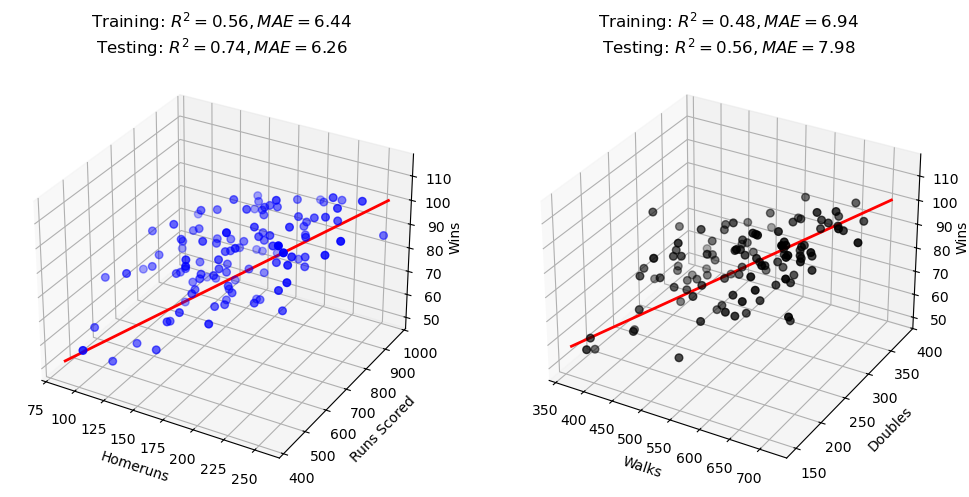

In [82]:
title_str = "Training: $R^2={0:.2f}, MAE={1:0.2f}$\nTesting: $R^2={2:.2f}, MAE={3:0.2f}$"

# --------------------------------------
# Add your P3 coding solution below.
# --------------------------------------

df = P1.copy()
train_data = df.sample(frac=0.8, random_state=562)
test_data = df.drop(train_data.index)

def gradient_des_OLSR(X, y):
    def f(theta):
        X_aug = np.c_[np.ones(X.shape[0]), X]
        pred = X_aug @ theta
        return np.mean((pred - y.ravel()) ** 2)
    
    theta_0 = np.zeros(X.shape[1] + 1)
    
    result = minimize(f, theta_0, method='L-BFGS-B')
    return result.x

def predict(X, theta):
    X = np.c_[np.ones(X.shape[0]), X]
    return X @ theta

# Model 1
X_train_1 = train_data[["Homeruns", "Runs Scored"]].to_numpy()
y_train_1 = train_data[["Wins"]].to_numpy()
x_test_1 = test_data[["Homeruns", "Runs Scored"]].to_numpy()
y_test_1 = test_data[["Wins"]].to_numpy()

theta1 = gradient_des_OLSR(X_train_1, y_train_1)
train_pred_1 = predict(X_train_1, theta1)
test_pred_1 = predict(x_test_1, theta1)

R2_train_1 = r2(y_train_1.ravel(),  train_pred_1.ravel())
mae_train_1 = mae(y_train_1.ravel(), train_pred_1.ravel())
R2_test_1  = r2(y_test_1.ravel(),   test_pred_1.ravel())
mae_test_1 = mae(y_test_1.ravel(),  test_pred_1.ravel())


# Model 2
X_train_2 = train_data[["Walks", "Doubles"]].to_numpy()
y_train_2 = train_data[["Wins"]].to_numpy()
X_test_2  = test_data[["Walks", "Doubles"]].to_numpy()
y_test_2  = test_data[["Wins"]].to_numpy()

theta_2 = gradient_des_OLSR(X_train_2, y_train_2)
yhat_train_2 = predict(X_train_2, theta_2)
yhat_test_2  = predict(X_test_2,  theta_2)

R2_train_2 = r2(y_train_2.ravel(),  yhat_train_2.ravel())
mae_train_2 = mae(y_train_2.ravel(), yhat_train_2.ravel())
R2_test_2  = r2(y_test_2.ravel(),   yhat_test_2.ravel())
mae_test_2 = mae(y_test_2.ravel(),  yhat_test_2.ravel())
              
# Plots
figure = plt.figure(figsize=(12, 12))

ax1 = figure.add_subplot(121, projection='3d')
ax1.scatter(X_train_1[:, 0], X_train_1[:, 1], y_train_1.ravel(), c="blue", s=30)

x1_range = np.linspace(X_train_1[:, 0].min(), X_train_1[:, 0].max(), 100)
x2_range = np.linspace(X_train_1[:, 1].min(), X_train_1[:, 1].max(), 100)
phi_line = np.c_[np.ones_like(x1_range), x1_range, x2_range]
y_line  = (phi_line @ theta1).ravel()
ax1.plot(x1_range, x2_range, y_line, c="red", linewidth=2)

ax1.set_xlabel("Homeruns")
ax1.set_ylabel("Runs Scored")
ax1.set_zlabel("Wins", rotation=90, labelpad=-0.7)
ax1.set_zlim(top=119)
ax1.set_title(title_str.format(R2_train_1, mae_train_1, R2_test_1, mae_test_1))

ax2 = figure.add_subplot(122, projection='3d')
ax2.scatter(X_train_2[:, 0], X_train_2[:, 1], y_train_2.ravel(), c="black", s=30)

x1_range = np.linspace(X_train_2[:, 0].min(), X_train_2[:, 0].max(), 100)
x2_range = np.linspace(X_train_2[:, 1].min(), X_train_2[:, 1].max(), 100)
phi_line = np.c_[np.ones_like(x1_range), x1_range, x2_range]
y_line  = (phi_line @ theta_2).ravel()
ax2.plot(x1_range, x2_range, y_line, c="red", linewidth=2)

ax2.set_xlabel("Walks")
ax2.set_ylabel("Doubles")
ax2.set_ylim(top=400)
ax2.set_zlabel("Wins", rotation=90, labelpad=-0.7)
ax2.set_zlim(top=119)
ax2.set_title(title_str.format(R2_train_2, mae_train_2, R2_test_2, mae_test_2))

plt.show()



****

**P4** (10 Points): Stochastic gradient descent optimized OLSR prediction models.

<img src="p4.png" width="600" style="float: right"/>

Using the **P1** dataframe, this question will construct and evaluate two OLSR prediction models that apply the stochastic gradient descent method to estimate the optimal parameters. You can write your own iterative solution or use the SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">minimize</a> function (see authorized Python modules above). Specifically:
- the first model will predict the number of ``wins`` when given  ``Homeruns`` and ``Runs Scored``,
- and the second model predict the number of ``wins`` when given ``Walks`` and ``Doubles``.

Before model construction and evaluation, **P1** will be randomly shuffled and then partitioned into two sets using an 80/20 split. Specifically, 80% of the data will be used to train, and 20% will be reserved for testing both models. 

For each prediction model, the correlation coefficient ($R^2$) and mean absolute error (MAE) measures for both the training and testing data sets are reported in the plot title. These may be calculated using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html">mean_absolute_error</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html">r2_score</a> sklearn functions (see authorized Python modules above).

To receive full credit, your solution must generate a plot similar to the reference plots. <span style="background-color: #FFFF00">**Note**: because the data is randomly shuffled each time the cell is run, your plots and measures will be slightly different than those provided in the reference plots.</span>

You may assume:
- Only the training data is used to generate the scatter plots.
- The colors used to generate plots are blue, black, and red (fitted line).
- The plot figure size is 12 inches in width and 12 inches in height.
- The default x-axis, y-axis, and z-axis tick values are used.
- The scatter plot marker size is 30.
- The z_label is rotated 90 degrees, and the zaxis.labelpad is set to -0.7.
- The method parameter in the minimize function is L-BFGS-B.
- A 25% random sample is used in the gradient calculation.


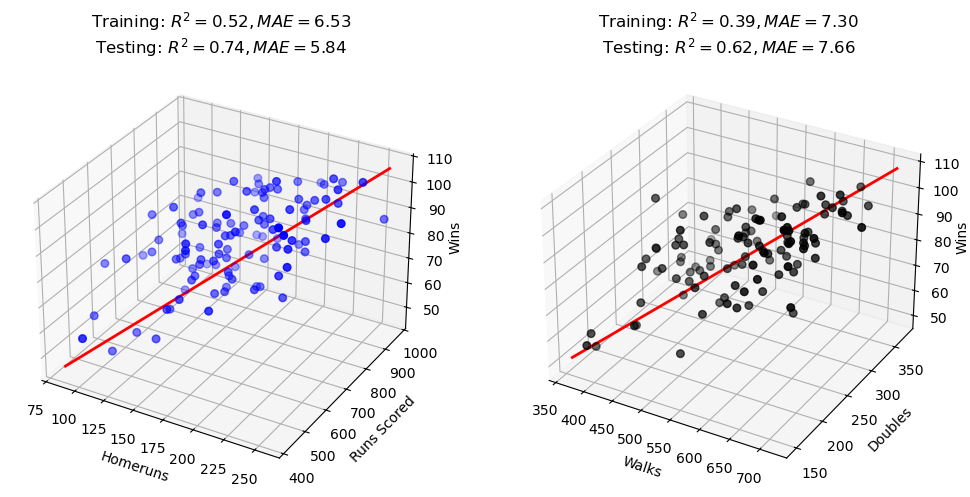

In [83]:
title_str = "Training: $R^2={0:.2f}, MAE={1:0.2f}$\nTesting: $R^2={2:.2f}, MAE={3:0.2f}$"

# --------------------------------------
# Add your P4 coding solution below.
# --------------------------------------

P1_shuffled = P1.sample(frac=1, random_state=562).reset_index(drop=True)
split_idx = int(0.8 * len(P1_shuffled))
train_data = P1_shuffled[:split_idx]
test_data = P1_shuffled[split_idx:]

# Fitting functions to use
def fit_OLSR(X, y):
    n, d = X.shape
    X1 = np.c_[np.ones(n), X] 
    sample_fraction = 0.25

    def obj(theta):
        k = max(1, int(np.ceil(sample_fraction * n)))
        idx = np.random.choice(n, size=k, replace=False)
        Xs = X1[idx]
        ys = y[idx]
        r = Xs @ theta - ys
        return np.mean(r * r)

    def gradient(theta):
        k = max(1, int(np.ceil(sample_fraction * n)))
        idx = np.random.choice(n, size=k, replace=False)
        Xs = X1[idx]
        ys = y[idx]
        r = Xs @ theta - ys
        return (2.0 / k) * (Xs.T @ r)

    theta0 = np.zeros(d + 1)
    res = minimize(obj, theta0, jac=gradient, method="L-BFGS-B")
    return res.x

def predict_theta(theta, X):
    X1 = np.c_[np.ones(len(X)), X]
    return X1 @ theta

# Model 1
X_train1 = train_data[["Homeruns", "Runs Scored"]].to_numpy(dtype=float)
y_train1 = train_data["Wins"].to_numpy(dtype=float)
X_test1 = test_data[["Homeruns", "Runs Scored"]].to_numpy(dtype=float)
y_test1 = test_data["Wins"].to_numpy(dtype=float)

theta_1 = fit_OLSR(X_train1, y_train1)
y_hat_train_1 = predict_theta(theta_1, X_train1)
y_hat_test_1 = predict_theta(theta_1, X_test1)

r2_train_1 = r2(y_train1, y_hat_train_1)
r2_test_1 = r2(y_test1, y_hat_test_1)
mae_train_1 = mae(y_train1, y_hat_train_1)
mae_test_1 = mae(y_test1, y_hat_test_1)

hr_min, hr_max = X_train1[:,0].min(), X_train1[:,0].max()
rs_min, rs_max = X_train1[:,1].min(), X_train1[:,1].max()
tline = np.linspace(0.0, 1.0, 60)
line1 = np.column_stack([hr_min + tline*(hr_max-hr_min), rs_min + tline*(rs_max-rs_min)])
line1_pred = predict_theta(theta_1, line1)


# Model 2
X_train_2 = train_data[["Walks", "Doubles"]].to_numpy(dtype=float)
y_train_2 = train_data["Wins"].to_numpy(dtype=float)
X_test_2 = test_data[["Walks", "Doubles"]].to_numpy(dtype=float)
y_test_2 = test_data["Wins"].to_numpy(dtype=float)

theta_2 = fit_OLSR(X_train_2, y_train_2)
y_hat_train_2 = predict_theta(theta_2, X_train_2)
y_hat_test_2 = predict_theta(theta_2, X_test_2)

r2_train_2 = r2(y_train_2, y_hat_train_2)
r2_test_2 = r2(y_test_2, y_hat_test_2)
mae_train_2 = mae(y_train_2, y_hat_train_2)
mae_test_2 = mae(y_test_2, y_hat_test_2)

wk_min, wk_max = X_train_2[:,0].min(), X_train_2[:,0].max()
db_min, db_max = X_train_2[:,1].min(), X_train_2[:,1].max()
tline2 = np.linspace(0.0, 1.0, 60)
line2 = np.column_stack([wk_min + tline2*(wk_max-wk_min), db_min + tline2*(db_max-db_min)])
line2_pred = predict_theta(theta_2, line2)

fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(X_train1[:,0], X_train1[:,1], y_train1, c="blue", s=30)
ax1.plot(line1[:,0], line1[:,1], line1_pred, c="red", linewidth=2)
ax1.set_xlabel("Homeruns")
ax1.set_ylabel("Runs Scored")
ax1.set_zlabel("Wins", rotation=90, labelpad=-0.7)
ax1.set_title(title_str.format(r2_train_1, mae_train_1, r2_test_1, mae_test_1))

ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(X_train_2[:,0], X_train_2[:,1], y_train_2, c="black", s=30)
ax2.plot(line2[:,0], line2[:,1], line2_pred, c="red", linewidth=2)
ax2.set_xlabel("Walks")
ax2.set_ylabel("Doubles")
ax2.set_zlabel("Wins", rotation=90, labelpad=-0.7)
ax2.set_title(title_str.format(r2_train_2, mae_train_2, r2_test_2, mae_test_2))

plt.show()